# Tensorflow Datasets

To install, run `pip install tensorflow-datasets`.

Use `tfds.as_numpy` to convert a `tf.data.Dataset` to a format that can be used with `tensorflow.keras` models.


In [14]:
# Fashion MNIST example
from tensorflow import keras
import tensorflow_datasets as tfds

# Load the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = tfds.as_numpy(
    tfds.load(
        "fashion_mnist",
        # get an array to decompose into training and test sets
        split=["train", "test"],
        batch_size=-1,  # get the entire dataset, no batching
        as_supervised=True,  # get the data with labels included
    )
)

training_images = training_images / 255.0
test_images = test_images / 255.0

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28, 1)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 717us/step - loss: 0.5314 - accuracy: 0.8122
Epoch 2/5
1875/1875 [==============================] - 1s 697us/step - loss: 0.4027 - accuracy: 0.8535
Epoch 3/5
1875/1875 [==============================] - 1s 695us/step - loss: 0.3671 - accuracy: 0.8663
Epoch 4/5
1875/1875 [==============================] - 1s 736us/step - loss: 0.3449 - accuracy: 0.8748
Epoch 5/5
1875/1875 [==============================] - 1s 709us/step - loss: 0.3300 - accuracy: 0.8786


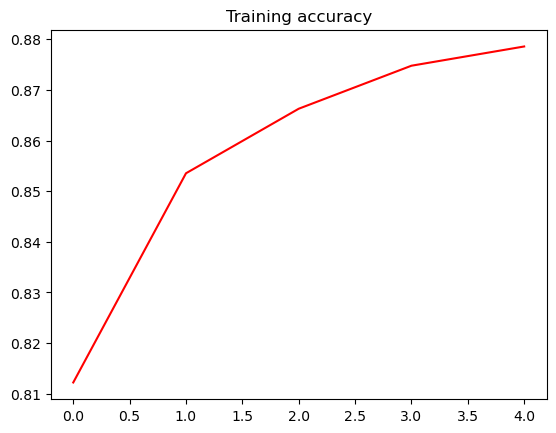

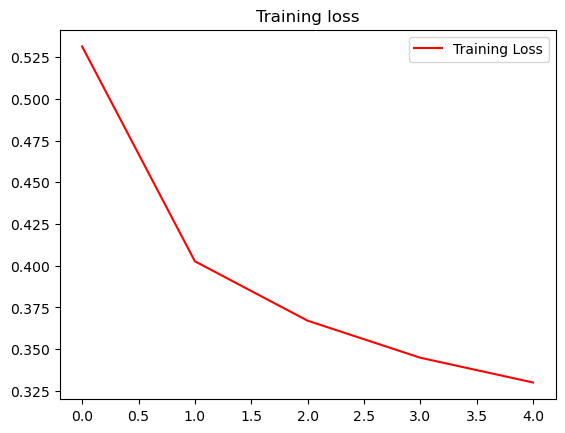

In [15]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
loss = history.history["loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.title("Training accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.title("Training loss")
plt.legend()

plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest loss:", test_loss)
print("\nTest accuracy:", test_acc)

313/313 [==============================] - 0s 581us/step - loss: 0.3572 - accuracy: 0.8720

Test loss: 0.3572326600551605

Test accuracy: 0.871999979019165


In [26]:
# Horses or humans example
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the horses or humans dataset
train_data = tfds.load("horses_or_humans", split="train", as_supervised=True)

# Load the validation data
val_data = tfds.load("horses_or_humans", split="test", as_supervised=True)


# Image augmentation
def augment_images(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255
    image = tf.image.random_flip_left_right(image)
    return image, label


train_data = train_data.map(augment_images)
train_batches = train_data.cache().shuffle(100).batch(10)

val_data = val_data.map(augment_images)
validation_batches = val_data.cache().shuffle(100).batch(10)

In [27]:
# Build the model, compile it and train it
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(32, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation="relu"),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    train_batches, epochs=5, validation_data=validation_batches, validation_steps=1
)

Epoch 1/5
103/103 [==============================] - 23s 213ms/step - loss: 0.3184 - accuracy: 0.8150 - val_loss: 3.0229e-05 - val_accuracy: 1.0000
Epoch 2/5


2024-08-24 19:22:12.631497: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-08-24 19:22:12.631570: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


103/103 [==============================] - 22s 212ms/step - loss: 0.1849 - accuracy: 0.9445 - val_loss: 0.2595 - val_accuracy: 0.8000
Epoch 3/5


2024-08-24 19:22:34.516902: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-08-24 19:22:34.516998: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


103/103 [==============================] - 21s 208ms/step - loss: 0.1095 - accuracy: 0.9581 - val_loss: 1.6034 - val_accuracy: 0.9000
Epoch 4/5


2024-08-24 19:22:55.927387: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-08-24 19:22:55.927469: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


103/103 [==============================] - 23s 220ms/step - loss: 0.0753 - accuracy: 0.9796 - val_loss: 0.0977 - val_accuracy: 0.9000
Epoch 5/5


2024-08-24 19:23:18.604486: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-08-24 19:23:18.604568: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


103/103 [==============================] - 23s 223ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 2.0479 - val_accuracy: 0.9000


2024-08-24 19:23:41.550368: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-08-24 19:23:41.550445: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


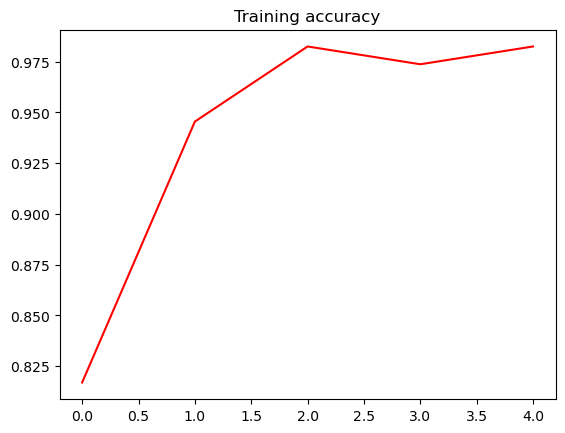

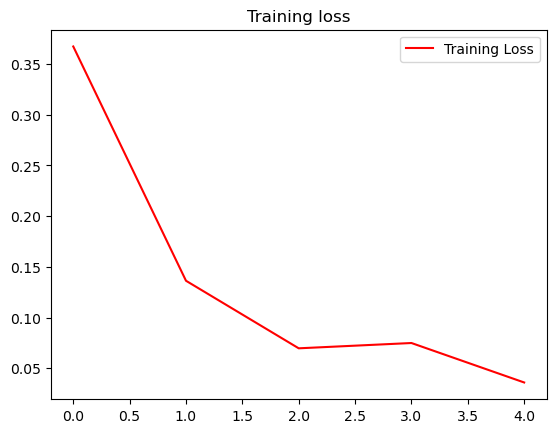

In [23]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
loss = history.history["loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.title("Training accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.title("Training loss")
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest loss:", test_loss)
print("\nTest accuracy:", test_acc)

# Tensorflow Addons

To install, run `pip install tensorflow-addons`.

Addons provide extra functionality to the core TensorFlow library.
This example shows the `rotate` image transformation.


In [ ]:
import tensorflow_addons as tfa
import tensorflow as tf


def augmentimages(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255
    image = tf.image.random_flip_left_right(image)
    image = tfa.image.rotate(image, 40, interpolation="NEAREST")
    return image, label

# TFDS advanced splits


In [ ]:
# Load first 10,000 examples from the training set
data = tfds.load("horses_or_humans", split="train[:10000]", as_supervised=True)

# Load the first 20% of the validation set
data = tfds.load("horses_or_humans", split="train[:20%]", as_supervised=True)

# Load the last 1,000 and append first 1,000 examples from the training set
data = tfds.load("cats_vs_dogs", split="train[:-1000]+train[:1000]", as_supervised=True)